In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import json
from matplotlib.patches import Rectangle

In [2]:
path = '/Users/fbickfordsmith/Google Drive/Project/attention/'
Xraw = np.load(path+'npy/mean_activations.npy')

Top 50 components explain 90% of variance


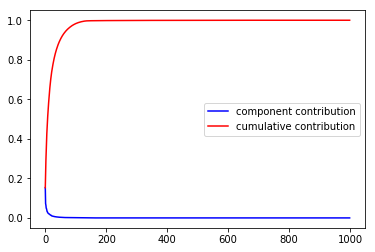

In [3]:
pca = PCA().fit(Xraw)
component_contrib = pca.explained_variance_ratio_
cumulative_contrib = np.cumsum(component_contrib)
plt.plot(component_contrib, label='component contribution', color='b')
plt.plot(cumulative_contrib, label='cumulative contribution', color='r')
plt.legend()
var = 90
print(f'Top {np.flatnonzero(cumulative_contrib>var/100)[0]+1}'
      f' components explain {var}% of variance')

In [4]:
top2_contrib = cumulative_contrib[1]
Xpca2 = PCA(n_components=2).fit_transform(Xraw)
print(f'Top 2 components explain {100*top2_contrib:.2f}% of variance')

Top 2 components explain 22.61% of variance


In [5]:
Xtsne = {}
for p in range(10, 51, 10):
    Xtsne[p] = TSNE(perplexity=p, method='exact', n_iter=10000).fit_transform(Xraw)

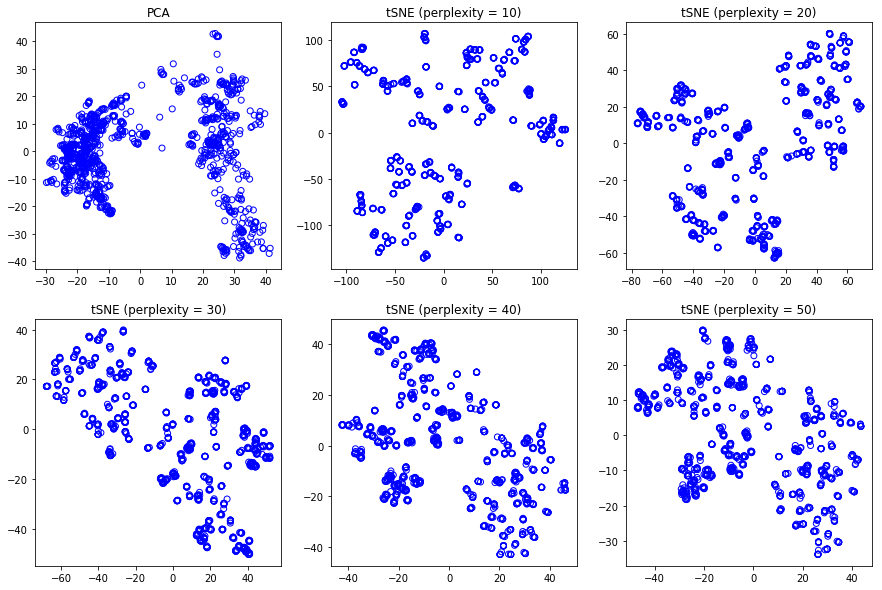

In [6]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

axes[0, 0].scatter(Xpca2[:, 0], Xpca2[:, 1], facecolors='none', edgecolors='b')
axes[0, 0].set_title('PCA')

for i, p in enumerate(range(10, 51, 10)):
    X = Xtsne[p]
    j = np.unravel_index(i+1, dims=(2, 3))
    axes[j].scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
    axes[j].set_title(f'tSNE (perplexity = {p})')
    
plt.show()

In [7]:
path = '/Users/fbickfordsmith/Google Drive/Project/attention/json/imagenet_class_index.json'
ind2desc = json.load(open(path))

In [8]:
# Xtsne = {}
# Xtsne[30] = np.random.randint(low=-60, high=60, size=(1000, 2))
x, y = Xtsne[30][:, 0], Xtsne[30][:, 1]

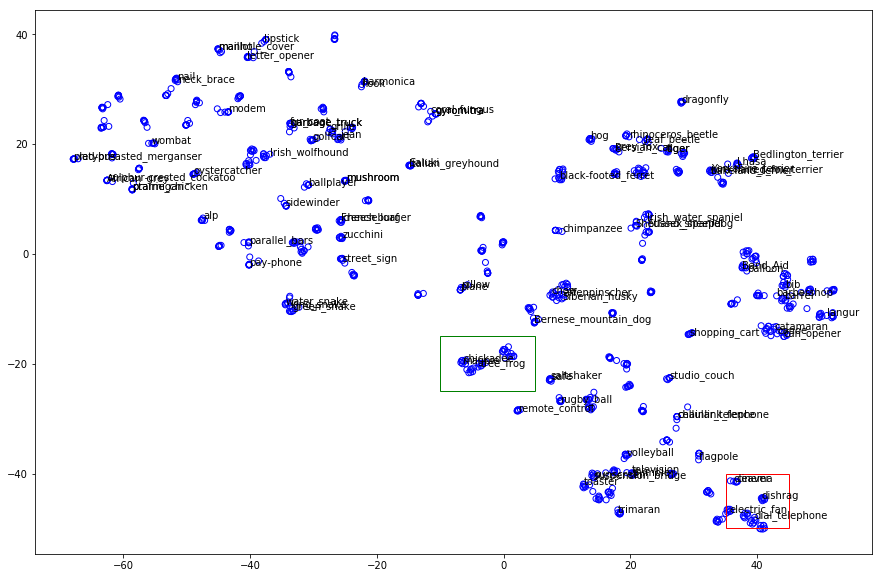

In [15]:
inds = np.random.choice(np.arange(1000), size=100)
words = np.array([ind2desc[str(i)][1] for i in inds])

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(x, y, facecolors='none', edgecolors='b')

for i, word in enumerate(words):
    plt.text(x[inds[i]], y[inds[i]], word)
    
# plt.xticks([])
# plt.yticks([])

# xlims = np.array([[-5, 15], [30, 40]])
# ylims = np.array([[25, 45], [-35, -25]])

xlims = np.array([[35, 45], [-10, 5]])
ylims = np.array([[-50, -40], [-25, -15]])

widths = [xlims[0, 1]-xlims[0, 0], xlims[1, 1]-xlims[1, 0]]
heights = [ylims[0, 1]-ylims[0, 0], ylims[1, 1]-ylims[1, 0]]
rect1 = Rectangle((xlims[0, 0], ylims[0, 0]), widths[0], heights[0], fill=False, edgecolor='r')
rect2 = Rectangle((xlims[1, 0], ylims[1, 0]), widths[1], heights[1], fill=False, edgecolor='g')

ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

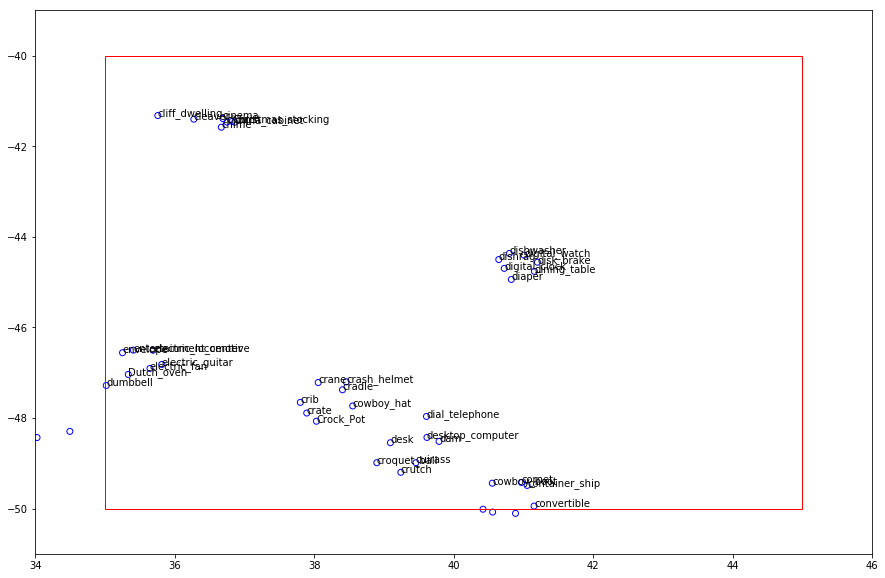

In [16]:
box_num = 0
colour = 'r'

inds = np.flatnonzero(
    (x > xlims[box_num, 0]) * (x < xlims[box_num, 1])
    * (y > ylims[box_num, 0]) * (y < ylims[box_num, 1]))
words = np.array([ind2desc[str(i)][1] for i in inds])

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(x, y, facecolors='none', edgecolors='b')

for i, word in enumerate(words):
    plt.text(x[inds[i]], y[inds[i]], word)

plt.xlim((xlims[box_num, 0]-1, xlims[box_num, 1]+1))
plt.ylim((ylims[box_num, 0]-1, ylims[box_num, 1]+1))
rect = Rectangle((xlims[box_num, 0], ylims[box_num, 0]), widths[box_num], heights[box_num], fill=False, edgecolor=colour)
ax.add_patch(rect)
plt.show()

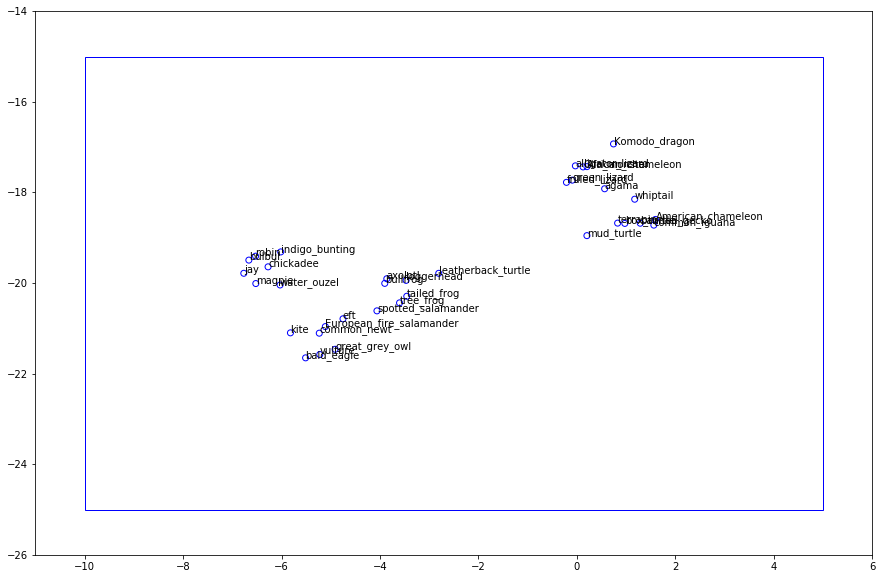

In [17]:
box_num = 1
colour = 'b'

inds = np.flatnonzero(
    (x > xlims[box_num, 0]) * (x < xlims[box_num, 1])
    * (y > ylims[box_num, 0]) * (y < ylims[box_num, 1]))
words = np.array([ind2desc[str(i)][1] for i in inds])

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(x, y, facecolors='none', edgecolors='b')

for i, word in enumerate(words):
    plt.text(x[inds[i]], y[inds[i]], word)
    
plt.xlim((xlims[box_num, 0]-1, xlims[box_num, 1]+1))
plt.ylim((ylims[box_num, 0]-1, ylims[box_num, 1]+1))
rect = Rectangle((xlims[box_num, 0], ylims[box_num, 0]), widths[box_num], heights[box_num], fill=False, edgecolor=colour)
ax.add_patch(rect)
plt.show()